# Fase 2 Actividad 2
### Discretización con un método $O(h^3)$

*Sistema de ecuaciones*


$\left\{\begin{matrix}
x_{n+1}&=&x_n+ẋ_nΔt+\frac{1}{2}\ddot{x}_nΔt\\
y_{n+1}&=&y_n+\dot{y}_nΔt+\frac{1}{2}\ddot{y}_nΔt
\end{matrix}\right.$

*Derivadas*

$\left\{\begin{matrix}
\dot{x}_n&=&ax_n-bx_ny_n\\
\dot{y}_n&=&-cy_n+dx_ny_n
\end{matrix}\right.$

*Segundas derivadas*

$\left\{\begin{matrix}
\ddot{x}_n&=&a\dot{x}_n-b(\dot{x}_ny_n+x_n\dot{y}_n\\
\ddot{y}_n&=&-c\dot{y}_n+d(\dot{x}_ny_n+x_n\dot{y}_n)
\end{matrix}\right.$

In [131]:
import numpy as np
import matplotlib.pyplot as plt


In [132]:
a = 1.0 # valores constantes
b = 0.02
c = 1.0
d = 0.01

t0 = 0.0     # Tiempo de inicio
tf = 30.0     # Tiempo final
x0 = 20.0    # Condición inicial presas
y0 = 20.0      # Condición inicial depredadores

h = 0.01     # Paso

In [133]:
nt = int((tf-t0)/h) #número de pasos
x = np.empty(nt+1)
y = np.empty(nt+1)

x[0] = x0
y[0] = y0

for step in range(nt):
  dx = a*x[step]-b*x[step]*y[step]
  dy = -c*y[step]+d*x[step]*y[step]
  
  d2x = a*dx - b*(dx*y[step] + x[step]*dy)
  d2y = -c*dy + d*(dx*y[step] + x[step]*dy)

  x[step+1] = x[step] + dx*h + 1/2*(d2x*(h**2))
  y[step+1] = y[step] + dy*h + 1/2*(d2y*(h**2))

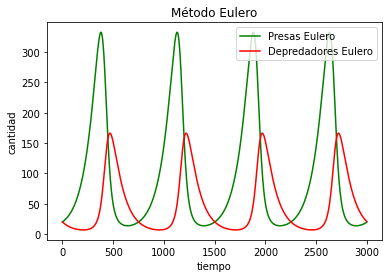

In [134]:
plt.plot(x, color = "Green", label = "Presas Eulero")
plt.plot(y, color = "Red", label = "Depredadores Eulero")
plt.xlabel("tiempo")
plt.ylabel("cantidad")
plt.title("Método Eulero")
plt.legend(loc = "best")
plt.show()

Solución con odeint

In [135]:
a = 1.0 # valores constantes
b = 0.02
c = 1.0
d = 0.01

t0 = 0.0     # Tiempo de inicio
tf = 30.0     # Tiempo final
x0 = 20.0    # Condición inicial presas
y0 = 20.0      # Condición inicial presas

h = 0.01     # Paso

In [136]:
import pandas as pd
from scipy import integrate
import ipywidgets as ipw

def model(f, t):
    x, y = f
    dxdt = x *a - b*y*x
    dydt = -y*c + d*y*x
    return np.array([dxdt, dydt])


t = np.linspace(0.,30, 3000)

f0 = [x0, y0]

res = integrate.odeint(model, f0, t)
xodeint, yodeint = res.T

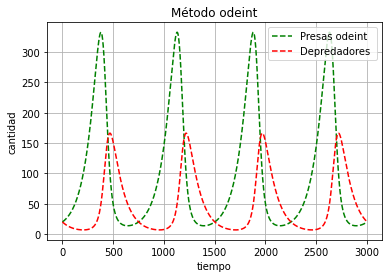

In [137]:
plt.figure()
plt.grid()
plt.plot(xodeint, '--', color = "Green", label = "Presas odeint")
plt.plot(yodeint, '--', color = "Red", label = "Depredadores ")
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title("Método odeint")
plt.legend(loc='best')
plt.show()

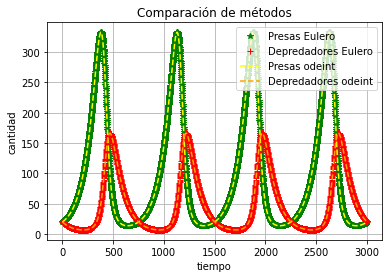

In [138]:
plt.figure()
plt.grid()
plt.plot(x, '*', color = "Green", label = "Presas Eulero")
plt.plot(y, '+', color = "Red", label = "Depredadores Eulero")
plt.plot(xodeint, '--', color = "Yellow", label = "Presas odeint")
plt.plot(yodeint, '--', color = "Orange", label = "Depredadores odeint")
plt.xlabel('tiempo')
plt.ylabel('cantidad')
plt.title("Comparación de métodos")
plt.legend(loc='best')
plt.show()

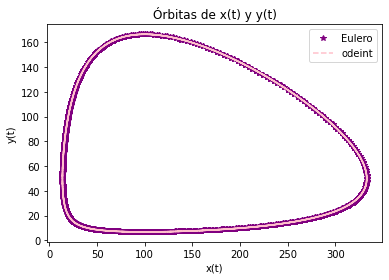

In [139]:
plt.title("Órbitas de x(t) y y(t)")
plt.plot(x, y, '*', label = "Eulero", color = "Purple")
plt.plot(xodeint,yodeint, '--', label = "odeint", color = "Pink")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend(loc='best')
plt.show()